**Water Potability**.This dataset is suitable for a supervised binary classification task, where machine learning models can be trained to predict water potability based on the provided water quality attributes. The models aim to classify water samples as potable (1) or not potable (0).


**Import all the Necessary Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/IntroAI/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Lets describe the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Plot histograms for Target variables**

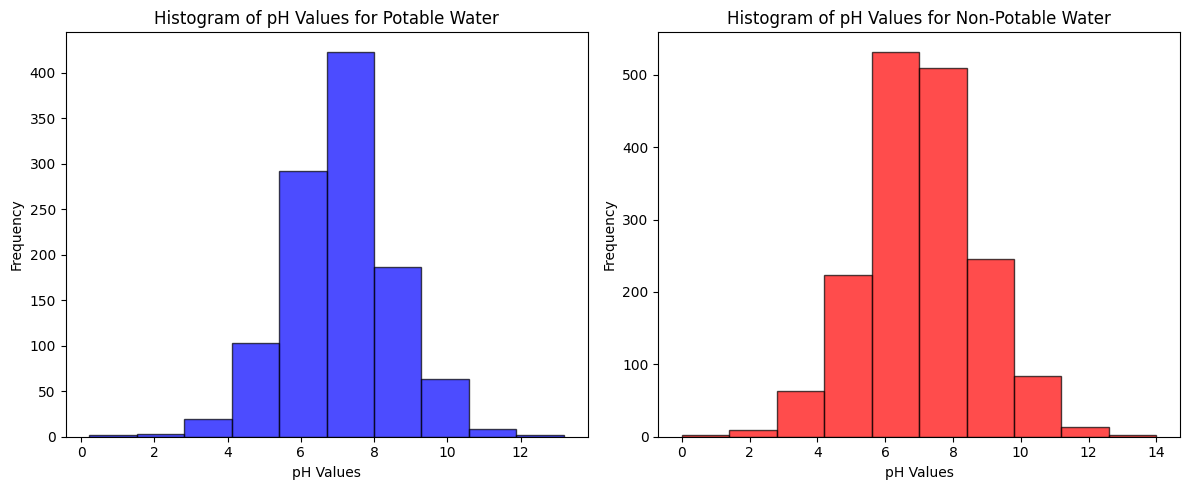

In [ ]:
# Sample data (replace this with your actual data)
potability = df['Potability']
ph_values = df['ph']

# Separate pH values based on potability
ph_potable = [ph_values[i] for i in range(len(ph_values)) if potability[i] == 1]
ph_non_potable = [ph_values[i] for i in range(len(ph_values)) if potability[i] == 0]

# Create two histograms side by side
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

plt.subplot(1, 2, 1)
plt.hist(ph_potable, bins=10, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel("pH Values")
plt.ylabel("Frequency")
plt.title("Histogram of pH Values for Potable Water")
plt.subplot(1, 2, 2)
plt.hist(ph_non_potable, bins=10, edgecolor='k', alpha=0.7, color='red')
plt.xlabel("pH Values")
plt.ylabel("Frequency")
plt.title("Histogram of pH Values for Non-Potable Water")
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

**Handling the missing values by replacing the values**

In [ ]:
#using the mean values of the attributes to replace
df['ph'].fillna(7.036752, inplace=True)
df['Sulfate'].fillna(333.073546, inplace=True)
df['Trihalomethanes'].fillna(66.622485, inplace=True)

In [ ]:
#checking whether the missing values are treated
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


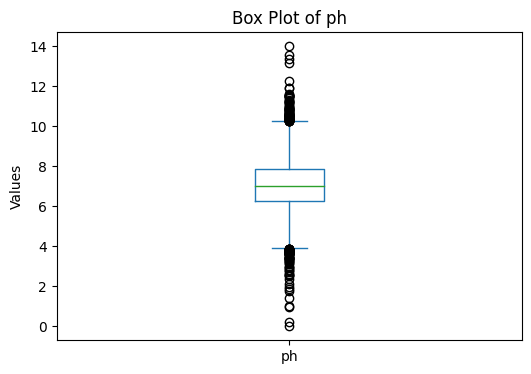

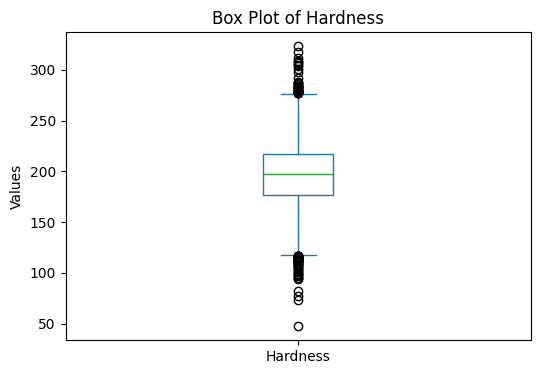

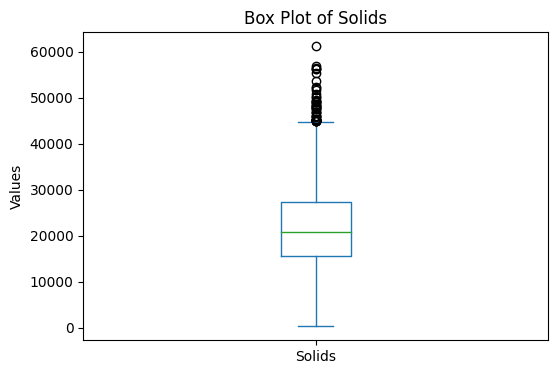

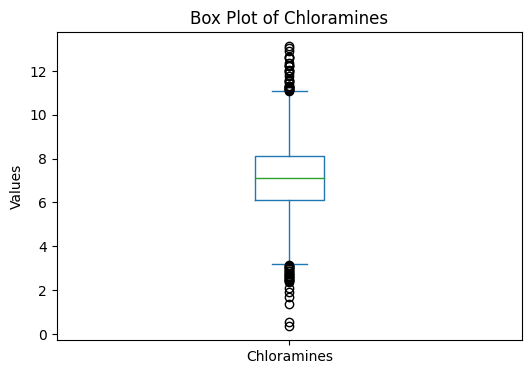

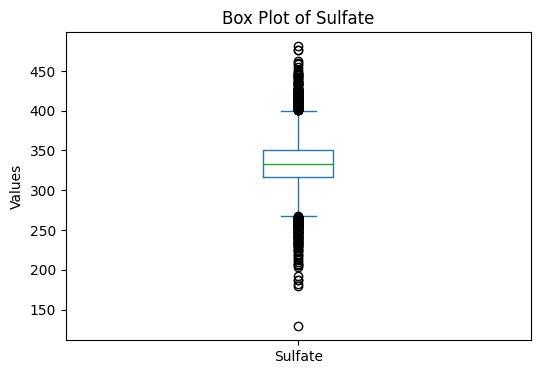

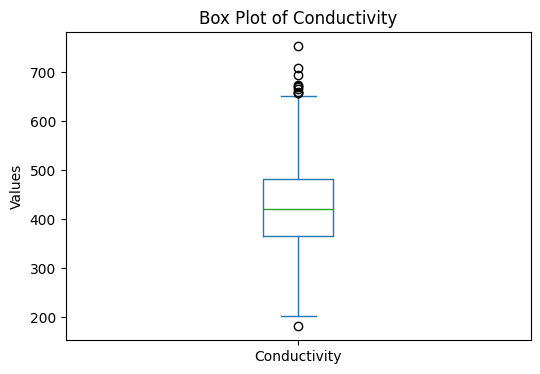

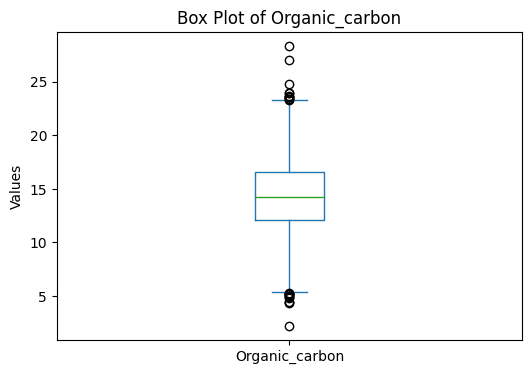

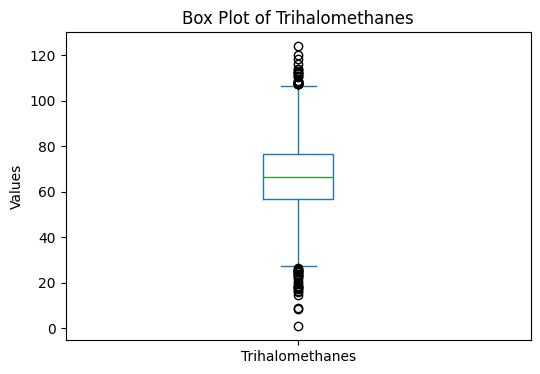

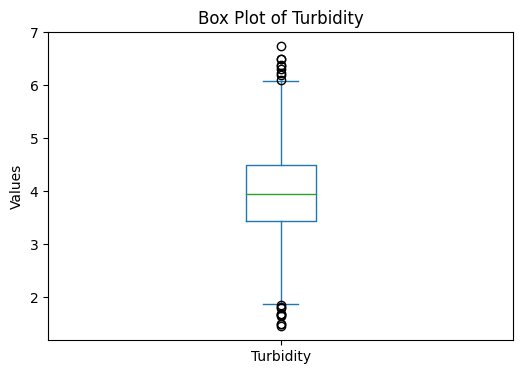

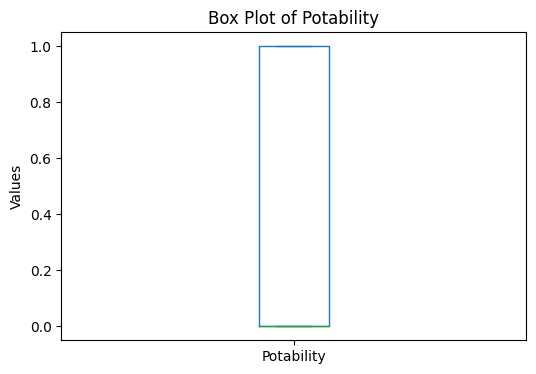

In [ ]:
#plotting box plots for each attribute in our dataset
for column in df.columns:
    plt.figure(figsize=(6, 4))
    df[column].plot(kind='box')
    plt.title(f"Box Plot of {column}")
    plt.ylabel("Values")
    plt.show()

**Lets visualise the correlation matrix**

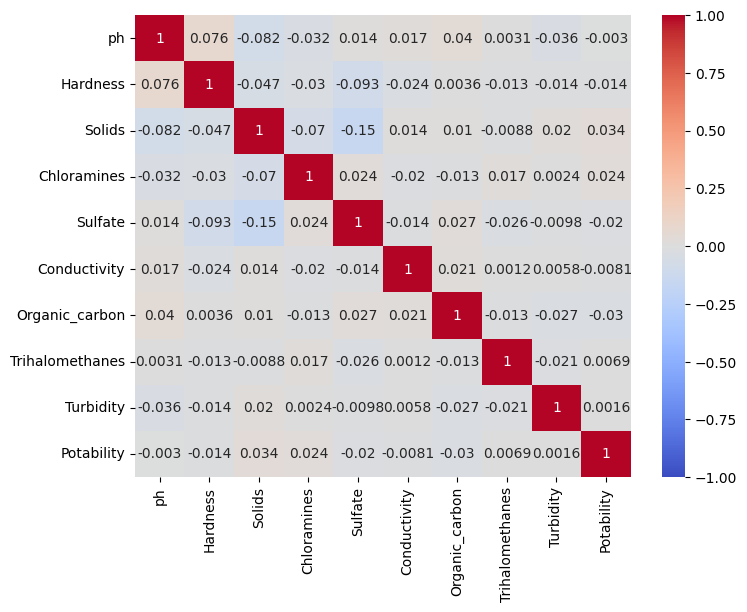

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
#dropping the target attribiute to get the X variable without potability column


In [ ]:
#checking the first 5 rows of X
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
#dropping columns of X from our dataset to get the target variable Potability in variable y
y = df.drop(X,axis=1)

In [ ]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Load libraries for splitting
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


**Split the dataset into Train and Test Split**

In [ ]:
#generating train test split having test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
column_names = df.columns

In [ ]:
feature_cols = column_names[:-1]

## Principal Component Analysis (PCA) for Water Potability Data
In this section, we will perform Principal Component Analysis (PCA) on the water potability dataset, which contains 10 attributes. PCA is a dimensionality reduction technique that can help us understand the structure of the data and potentially reduce the number of features while preserving the most important information.

# Standardize the features (important for PCA)
It's essential to standardise the features so that they have a zero mean and unit variance because PCA is sensitive to the scale of the features.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X_stand = StandardScaler().fit_transform(X)

**Performing PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Apply PCA to the standardized data
principalComponents = pca.fit_transform(X_stand)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Will plot a graph for variance ratio and use the explained variance ratio to determine the number of principle components to keep based on the quantity of explained variance we want.

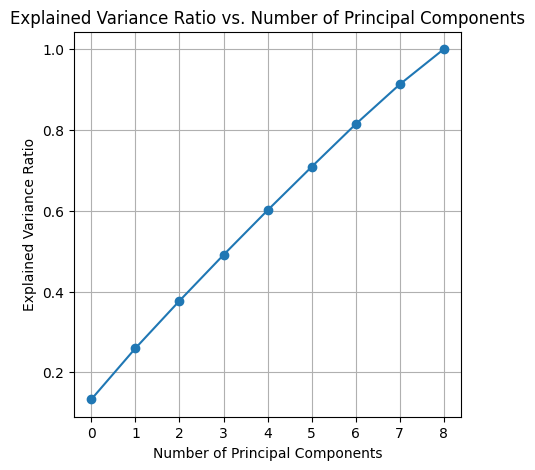

In [ ]:
# Plot explained variance ratio
import numpy as np
plt.figure(figsize=(5, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()

In [ ]:
#making a dataset with principal components and the target attribute
finalDf = pd.concat([principalDf, df[['Potability']]], axis = 1)

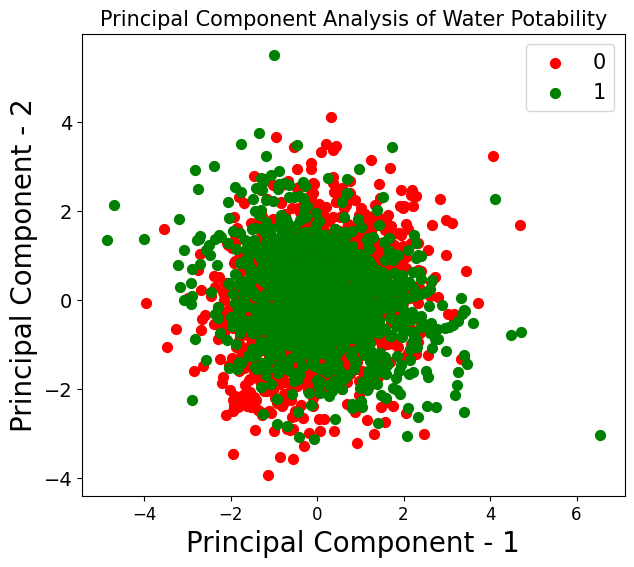

In [ ]:
# Plot the scatter plot between the principal component 1 and principal component 2
plt.figure(figsize=(7,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Water Potability",fontsize=15)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Potability'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

plt.legend(targets,prop={'size': 15})

# **Naive Bias Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
import time
# Build a Gaussian Classifier
model = GaussianNB()
# Model training
start_time=time.time()
model.fit(X_train, y_train)
# Predict Output
predicted = model.predict(X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print("Time Required: %.3f"%elapsed_time)


Time Required: 0.015


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred_NB = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred_NB, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6195320447609359
F1 Score: 0.6677709126683801


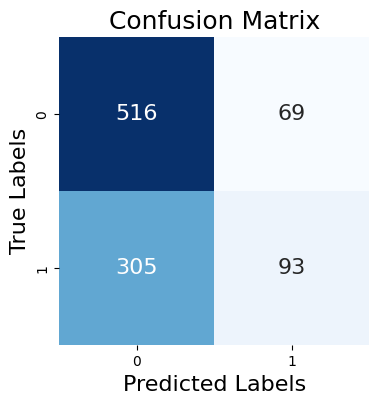

In [ ]:
cm = confusion_matrix(y_test, y_pred_NB)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Plotting the ROC curve for evaluation**

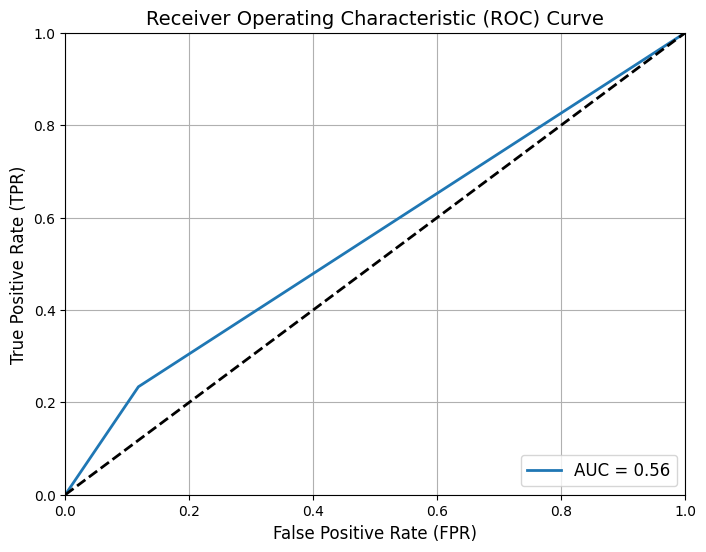

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_NB)

# Compute AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_NB)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.show()

# **Gradient Boosting Classifier**


In [ ]:
#importing the necessary libraries
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
import time
# define the model
model = GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=100,subsample=0.70)
# define the evaluation method
start_time = time.time()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
model.fit(X_train,y_train)
end_time = time.time()
elapsed_time = end_time - start_time
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Time Required: %.3f"%elapsed_time)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Accuracy: 0.648 (0.022)
Time Required: 38.127


In [ ]:
#predicting the test data using the trained model
y_pred_GB = model.predict(X_test)

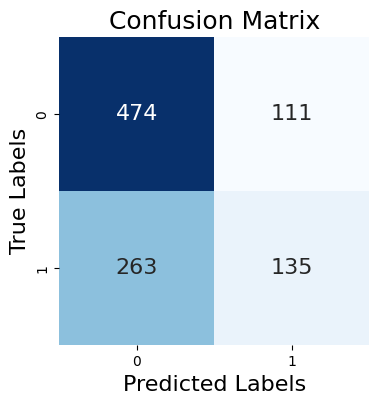

In [ ]:
# Plot the confusion matrix using seaborn and matplotlib
cm = confusion_matrix(y_test, y_pred_GB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()